In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import netCDF4

Ici, on cherche à produire une carte représentant la position d'un parc éolien, en se basant sur les données bathymétrique téléchargées sur https://download.gebco.net



Il s'agit donc dans un premier temps d'extraire ces données et de plot un fond de carte à partir de ces données bathymétriques.

In [2]:
#Création de dataset à partir de fichiers téléchargés. Ici pour l'île d'Oléron, la Méditérannée et la Bretagne
nc1 = netCDF4.Dataset('C:/Users/Jordan/Documents/Bluegreen/GEBCO_07_Dec_2023_7cfdb93e4c12/gebco_2023_n46.2_s45.6_w-2.25_e-1.0.nc')#Oleron
#nc2 = netCDF4.Dataset('C:/Users/Jordan/Documents/Bluegreen/GEBCO_27_Nov_2023_f392ab3e28c0/gebco_2023_n43.5017_s42.3564_w5.5385_e7.0958.nc')#Mediterrane
#nc3 = netCDF4.Dataset('C:/Users/Jordan/Documents/Bluegreen/GEBCO_27_Nov_2023_f392ab3e28c0/gebco_2023_n48.5932_s47.8571_w-5.1711_e-4.4158.nc')#Brest

#nc1.variables

In [3]:
# Extraction des variable (Profondeur et coordonnées)
Blat1 = nc1.variables['lat'][:].data
Blon1 = nc1.variables['lon'][:].data
Bdepth1 = nc1.variables['elevation'][:].data
"""
Blat2 = nc2.variables['lat'][:].data
Blon2 = nc2.variables['lon'][:].data
Bdepth2 = nc2.variables['elevation'][:].data

Blat3 = nc3.variables['lat'][:].data
Blon3 = nc3.variables['lon'][:].data
Bdepth3 = nc3.variables['elevation'][:].data
"""
print(np.shape(Blat1),np.shape(Blon1),np.shape(Bdepth1))
#print(np.shape(Blat2),np.shape(Blon2),np.shape(Bdepth2))
#print(np.shape(Blat3),np.shape(Blon3),np.shape(Bdepth3))

(144,) (300,) (144, 300)


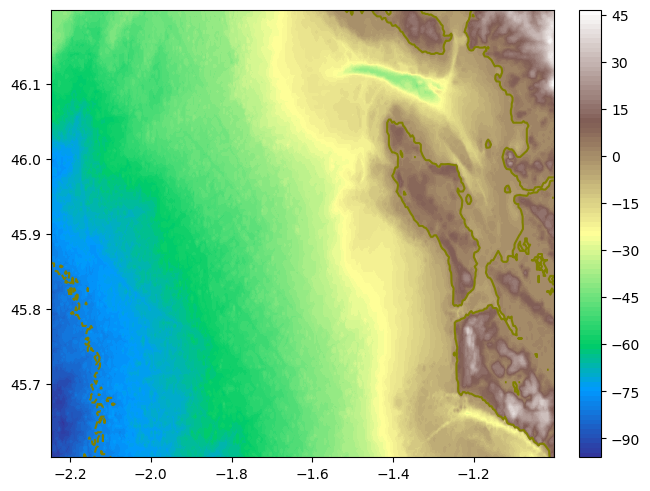

In [4]:
#Fond de carte pour l'île d'Oléron
lat1,lon1 = np.meshgrid (Blat1,Blon1)
fig,ax1 = plt.subplots(layout='constrained')
CF1=ax1.contourf(Blon1,Blat1,Bdepth1,levels=100,cmap='terrain')
CS1=ax1.contour(Blon1,Blat1,Bdepth1,levels=1,colors='olive')
cbat =fig.colorbar(CF1)
#plt.axis('off')
#plt.savefig('bathy_map_OLE.png') 


In [5]:
"""
#Fond de carte pour la Mediterranée
fig,ax2 = plt.subplots(layout='constrained')
lat2,lon2 = np.meshgrid (Blat2,Blon2)
CF2=ax2.contourf(Blon2,Blat2,Bdepth2,levels=100,cmap='terrain')
CS2=ax2.contour(Blon2,Blat2,Bdepth2,levels=1,colors='olive')
plt.axis('off')
plt.savefig('bathy_map_MED.png') 
#cbat =fig.colorbar(CF2)

#Fond de carte pour la Bretagne
fig,ax3= plt.subplots(layout='constrained')
lat3,lon3 = np.meshgrid (Blat3,Blon3)
CF2=ax3.contourf(Blon3,Blat3,Bdepth3,levels=100,cmap='terrain')
CS2=ax3.contour(Blon3,Blat3,Bdepth3,levels=1,colors='olive')
#cbat =fig.colorbar(CF3)
plt.axis('off')
plt.savefig('bathy_map_BRT.png') 
"""

"\n#Fond de carte pour la Mediterranée\nfig,ax2 = plt.subplots(layout='constrained')\nlat2,lon2 = np.meshgrid (Blat2,Blon2)\nCF2=ax2.contourf(Blon2,Blat2,Bdepth2,levels=100,cmap='terrain')\nCS2=ax2.contour(Blon2,Blat2,Bdepth2,levels=1,colors='olive')\nplt.axis('off')\nplt.savefig('bathy_map_MED.png') \n#cbat =fig.colorbar(CF2)\n\n#Fond de carte pour la Bretagne\nfig,ax3= plt.subplots(layout='constrained')\nlat3,lon3 = np.meshgrid (Blat3,Blon3)\nCF2=ax3.contourf(Blon3,Blat3,Bdepth3,levels=100,cmap='terrain')\nCS2=ax3.contour(Blon3,Blat3,Bdepth3,levels=1,colors='olive')\n#cbat =fig.colorbar(CF3)\nplt.axis('off')\nplt.savefig('bathy_map_BRT.png') \n"

Il est tout à fait possible d'extraire les extremums et la moyenne de la bathymétrie étant donné que les données, ont été extraite sous la forme d'un array, un objet courant dans l'analyse de données sous Python.

In [6]:
print('Minimum pour Oléron=',Bdepth1.min(),'m') 
print('Maximum pour Oléron=',Bdepth1.max(),'m')
print('Moyenne pour Oléron=',Bdepth1.mean(),'m')

#print('Minimum pour la Méditerranée=',Bdepth2.min(),'m') 
#print('Maximum pour la Méditerranée=',Bdepth2.max(),'m')
#print('Moyenne pour la Méditerranée=',Bdepth2.mean(),'m')

#print('Minimum pour la Bretagne=',Bdepth3.min(),'m') 
#print('Maximum pour la Bretagne=',Bdepth3.max(),'m')
#print('Moyenne pour la Bretagne=',Bdepth3.mean(),'m')

Minimum pour Oléron= -95 m
Maximum pour Oléron= 46 m
Moyenne pour Oléron= -33.32560185185185 m


Cependant, dans le cas de la moyenne, les valeurs supérieures à 0 (i.e. le continent) sont prises en compte ce que peux influencer l'influencer. Puisque seules les valeurs sous le niveau de la mer risquent de nous intéresser.

Pour récupérer les donner qui nous intéresse nous alors devoir tester les valeurs contenues dans Bdepth, et vérifier et en conserver que celles qui sont inférieures ou égales à 0. 

In [7]:
def average_SL(Blat,Blon,Bdepth):
    num=0
    M=0
    for i in range(len(Blat)):
        for j in range(len(Blon)):

            a=Bdepth[i,j]
            if a<0 :
                    num+=a
                    M+=1
                    avg=num/M
    return avg
print('Moyenne sous le niveau de la mer pour Oléron=',average_SL(Blat1,Blon1,Bdepth1),"m")
#print('Moyenne sous le niveau de la mer pour La Mediterranée=',average_SL(Blat2,Blon2,Bdepth2),"m")
#print('Moyenne sous le niveau de la mer pour La Bretagne=',average_SL(Blat3,Blon3,Bdepth3),"m")

Moyenne sous le niveau de la mer pour Oléron= -41.034597325571816 m


Par la suite, on trouve quelques essais visant à extraire les données d'un shapefile et de le plot.


In [8]:
shape1 = gpd.read_file("C:/Users/Jordan/Documents/Bluegreen/shape/N_Eolien_AO7_Sud_Atlantique_epsg2154_092022_shape/N_Eolien_AO7_Sud_Atlantique_Parc1_epsg2154_S.shp")
shape2 = gpd.read_file("C:/Users/Jordan/Documents/Bluegreen/shape/N_Eolien_AO7_Sud_Atlantique_epsg2154_092022_shape/N_Eolien_AO7_Sud_Atlantique_Parc2_epsg2154_S.shp")

shape1.crs

<Projected CRS: EPSG:2154>
Name: RGF93 v1 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica (France métropolitaine including Corsica).
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993 v1
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

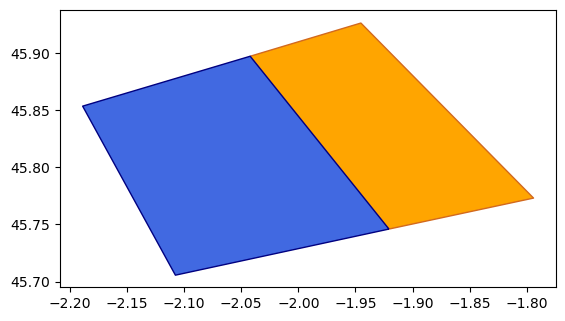

In [9]:
projo1= shape1.to_crs('epsg:4326')
projo2= shape2.to_crs('epsg:4326')

fig, ax1 = plt.subplots()
projo1.plot(ax=ax1,color='orange', edgecolor='chocolate',)
projo2.plot(ax=ax1,color='royalblue', edgecolor='navy')
ax1.set_aspect('equal')
plt.show()

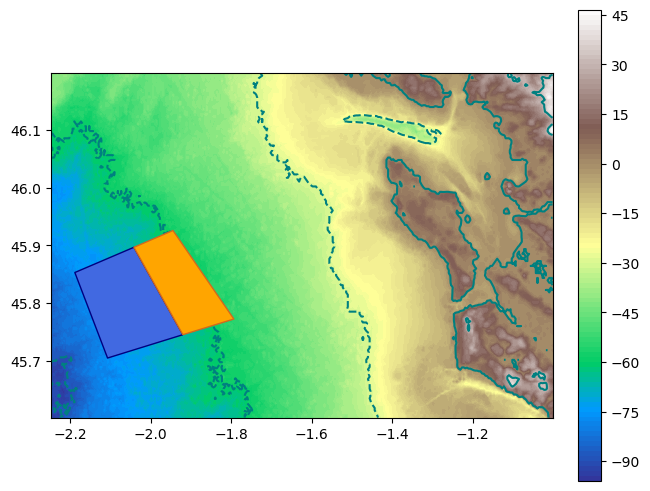

In [10]:
#Fond de carte pour l'île d'Oléron
lat1,lon1 = np.meshgrid (Blat1,Blon1)
fig,ax1 = plt.subplots(layout='constrained')
projo1.plot(ax=ax1,color='orange', edgecolor='chocolate',zorder=10)
projo2.plot(ax=ax1,color='royalblue', edgecolor='navy',zorder=9)
CF1=ax1.contourf(Blon1,Blat1,Bdepth1,levels=100,cmap='terrain',zorder=1)
CS1=ax1.contour(Blon1,Blat1,Bdepth1,levels=4,colors='teal',zorder=2)
cbat =fig.colorbar(CF1)
#plt.axis('off')
#plt.savefig('yipee') 

In [11]:
C1=list(projo1["geometry"][0].exterior.coords)
C2=list(projo2["geometry"][0].exterior.coords)

list